In [1]:
!pip install PyMuPDF
import fitz

pdf_file = '/content/AnnualReport2023.pdf'
doc = fitz.open(pdf_file)

In [2]:
page1 = doc.load_page(153)
tabs1 = page1.find_tables()
if tabs1.tables:
  print(tabs1[0].extract())
  arr=tabs1[0].extract()


[['S.\nNo.', 'Parties', 'Date of\nOrder', 'Decision'], ['Harassment of Newsmen', None, None, None], ['1.', 'Complaint of Shri Dinesh Singh Bhadoriya,\nShri Yogendra Singh Bhadoriya and Sumer\nSingh Narwariya, Journalists, Madhya\nPradesh against Shri Mahavir Bhagel, Jail\nSuprinendent, Sub Jail Mehgaon Central\nJail, Gwalior, Madhya Pradesh.\n(13/17/19-20-PCI)', '15.11.2022', 'Upheld'], ['2.', 'Complaint of Shri Yogendra Kashinath\nDorkar, Editor of Dainik Nandurbar\nDinank Uttar Maharashtra against\nDr. Rajendra Bharud, Collector, District\nNandurbar, Maharashtra. (124/2021-B)', '15.11.2022', 'Disposed of\n(Complainant\nCensured)'], ['3.', 'Complaint of Shri Jagpal Singh,\nCorrespondent, Dainik Aaj, District General\nSecretary, UP Journalists Association\n(UPJA), Gonda, U.P. against Shri Praveen\nKumar, Commander, Railway Protection\nForce, Eastern Railway Station, Gonda,\nU.P. (13/207/18-19-PCI)', '28.02.2023', 'Disposed of\n(with liberty\nto the\nComplainant\nto\napproach\ncourt)'],

In [3]:

page2 = doc.load_page(154)
tabs2 = page2.find_tables()
if tabs2.tables:
  print(tabs2[0].extract())
  arr1=tabs2[0].extract()

[['Suo-Motu Cognizance', None, None, None], ['6.', 'Suo-motu cognizance w.r.t Police\naction on Journalist in Chandigarh.\n(13/74/SM/19-20-PCI)', '22.09.2022', 'Disposed of\nwith observa\xad\ntion & Com\xad\npensation'], ['7.', 'Suo-motu cognizance with regard to at\xad\ntack on Shri Anil Sinha, Photo-Journalist,\nRashtriya Sahara and Shri Sanjeev Verma,\nPhoto-Journalist, Hindustan Times by\nDelhi Police. (13/185/SM/19-20-PCI)', '22.09.2022', 'Disposed of'], ['8.', 'Suo-Motu cognizance w.r.t Rajasthan\nChief Minister’s open threat to media and\nits right to freedom of expression. (1/2020/\nSM/B)', '15.11.2022', 'Upheld'], ['9.', 'Suo-Motu cognizance with re\xad\ngard to alleged attack and killing of\nShri Sayed Adil Wahab, Reporter in\nBhopal, M.P.(SM/NOV/4/2020-B)', '15.11.2022', 'Disposed of'], ['10.', 'Suo-Motu cognizance with regard to Ra\xad\njkot Collector allegedly bribing the re\xad\nporters for positive media coverage of\nstate level Republic Day function. (23/\nSM/2020-B)', 

In [4]:
arr.extend(arr1)


In [5]:
complaint=[]
some_number=[]
date=[]
decision=[]
type_complaint=[]
for i in arr:
  if i[-1]=="Decision":
    continue
  if i[-1]==None:
    complaint_type=i[0].replace('\n', ' ').replace('  ',' ')
    continue
  complaint.append(i[1].replace("\xad\n", '').replace("\xad","").replace('\n', ' ').replace('  ',' '))
  date.append(i[2])
  decision.append(i[3].replace('\n', ' ').replace('  ',' '))
  type_complaint.append(complaint_type)



In [6]:
import re
for i in range(len(complaint)):
  t=re.split(r"\(([^)]*/[^)]*)\)",complaint[i])
  complaint[i]=t[0]
  some_number.append(t[1])

In [7]:
for i in range(len(complaint)):
  print(type_complaint[i])
  print(complaint[i])
  print(some_number[i])
  print(date[i])
  print(decision[i])
  print('---'*10)

Harassment of Newsmen
Complaint of Shri Dinesh Singh Bhadoriya, Shri Yogendra Singh Bhadoriya and Sumer Singh Narwariya, Journalists, Madhya Pradesh against Shri Mahavir Bhagel, Jail Suprinendent, Sub Jail Mehgaon Central Jail, Gwalior, Madhya Pradesh. 
13/17/19-20-PCI
15.11.2022
Upheld
------------------------------
Harassment of Newsmen
Complaint of Shri Yogendra Kashinath Dorkar, Editor of Dainik Nandurbar Dinank Uttar Maharashtra against Dr. Rajendra Bharud, Collector, District Nandurbar, Maharashtra. 
124/2021-B
15.11.2022
Disposed of (Complainant Censured)
------------------------------
Harassment of Newsmen
Complaint of Shri Jagpal Singh, Correspondent, Dainik Aaj, District General Secretary, UP Journalists Association (UPJA), Gonda, U.P. against Shri Praveen Kumar, Commander, Railway Protection Force, Eastern Railway Station, Gonda, U.P. 
13/207/18-19-PCI
28.02.2023
Disposed of (with liberty to the Complainant to approach court)
------------------------------
Harassment of News

In [8]:
print(len(complaint),len(some_number),len(date),len(decision),len(type_complaint))

11 11 11 11 11


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
!pip install locationtagger
!pip install lxml[html_clean]

In [9]:
# %%
import nltk
import spacy

# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
# Download the specific resource required by locationtagger
nltk.download('averaged_perceptron_tagger_eng')

# Download the missing resource required by locationtagger for named entity chunking
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Dow

True

In [10]:
import locationtagger

In [11]:
for i in range(len(complaint)):
  place_entity = locationtagger.find_locations(text = complaint[i])
  print(place_entity.cities,place_entity.regions,place_entity.countries)

['Gwalior'] [] []
[] ['Maharashtra'] []
['Gonda'] [] []
['Bhopal'] [] []
[] [] []
['Chandigarh'] ['Chandigarh'] []
['Delhi'] [] []
[] [] []
['Bhopal'] [] []
['Republic'] [] []
[] ['Bihar'] []


In [12]:
place_entity.cities

[]

In [13]:

!pip install gliner-spacy


In [2]:
## Restart the kernel if in collab..

In [14]:
import spacy

nlp = spacy.blank('en')
nlp.add_pipe('gliner_spacy')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:564: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [15]:
for i in range(len(complaint)):
  text = complaint[i]
  doc = nlp(text)
  print(i+1)
  for ent in doc.ents:
    print(ent.text, ent.label_)
  print("--------------")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


1
Shri Dinesh Singh Bhadoriya person
Shri Yogendra Singh Bhadoriya person
Sumer Singh Narwariya person
Journalists organization
Shri Mahavir Bhagel person
Jail Suprinendent organization
--------------
2
Shri Yogendra Kashinath Dorkar person
Dainik Nandurbar Dinank Uttar Maharashtra organization
Dr. Rajendra Bharud person
--------------
3
Shri Jagpal Singh person
Dainik Aaj person
UP Journalists Association organization
Shri Praveen Kumar person
Railway Protection Force organization
--------------
4
Shri Anam Ibrahim person
Director General of Police organization
--------------
5
Mr. Naveen Das person
Satya Ra Swara Nirbhay organization
Government of Odisha organization
--------------
6
Police organization
Journalist person
--------------
7
Shri Anil Sinha person
Rashtriya Sahara organization
Shri Sanjeev Verma person
Hindustan Times organization
Delhi Police organization
--------------
8
Rajasthan Chief Minister person
media organization
--------------
9
Suo-Motu organization
Shri Saye

##Affiliation of Person

In [16]:
aff=[]
flag=0
for i in range(len(complaint)):
  p=[]
  if "suo-motu" in complaint[i].lower():
    if "w.r.t" in complaint[i].lower():
      t=complaint[i].split("w.r.t")

      t=t[-1]
      doc = nlp(t)
      for j in range(len(doc.ents)-1):
        print(doc.ents[j].text, doc.ents[j].label_,doc.ents[j].start_char,doc.ents[j].end_char)
        if doc.ents[j].label_=='person':
          a=doc.ents[j].text
          k=j+1
          affp=False
          if doc.ents[j+1].label_=='person' and doc.ents[j+1].start_char-doc.ents[j].end_char>6:
              affp=t[doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
          elif doc.ents[j+1].label_=='organization' and doc.ents[j+1].start_char-doc.ents[j].end_char>5:
              affp=t[doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
          while(k<len(doc.ents)):
            if doc.ents[k].label_=='organization':
              if affp:
                aff.append([a,affp+doc.ents[k].text])
              else:
                aff.append([a,t[doc.ents[k-1].end_char+1:doc.ents[k].start_char-1]+","+doc.ents[k].text])

              break
            k+=1
          print(aff[-1])


    elif "with regard to" in complaint[i].lower():
      t=complaint[i].split("with regard to")
      t=t[-1]
      doc=nlp(t)
      for j in range(len(doc.ents)-1):
        print(doc.ents[j].text, doc.ents[j].label_,doc.ents[j].start_char,doc.ents[j].end_char)
        if doc.ents[j].label_=='person':
          a=doc.ents[j].text
          k=j+1
          affp=False
          if doc.ents[j+1].label_=='person' and doc.ents[j+1].start_char-doc.ents[j].end_char>6:
              affp=t[doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
          elif doc.ents[j+1].label_=='organization' and doc.ents[j+1].start_char-doc.ents[j].end_char>5:
              affp=t[doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
          while(k<len(doc.ents)):
            if doc.ents[k].label_=='organization':
              if affp:
                aff.append([a,affp+doc.ents[k].text])
              else:
                aff.append([a,t[doc.ents[k-1].end_char+1:doc.ents[k].start_char-1]+","+doc.ents[k].text])

              break
            k+=1
          print(aff[-1])




  elif "against" in complaint[i]:
    t=complaint[i].split("against")
    doc = nlp(t[0])
    print(i+1)

    for j in range(len(doc.ents)-1):
        print(doc.ents[j].text, doc.ents[j].label_,doc.ents[j].start_char,doc.ents[j].end_char)
        if doc.ents[j].label_=='person':
          a=doc.ents[j].text
          k=j+1
          affp=False
          if doc.ents[j+1].label_=='person' and doc.ents[j+1].start_char-doc.ents[j].end_char>6:
              print("in person")
              affp=t[0][doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
          elif doc.ents[j+1].label_=='organization' and doc.ents[j+1].start_char-doc.ents[j].end_char>5:
              print("in organization")
              affp=t[0][doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
          while(k<len(doc.ents)):
            if doc.ents[k].label_=='organization':
              if affp:
                aff.append([a,affp+doc.ents[k].text])
              else:
                aff.append([a,t[0][doc.ents[k-1].end_char+1:doc.ents[k].start_char-1]+","+doc.ents[k].text])

              break
            k+=1
          print(aff[-1])


    doc = nlp(t[1])
    for j in range(len(doc.ents)-1):
        print(doc.ents[j].text, doc.ents[j].label_,doc.ents[j].start_char,doc.ents[j].end_char)
        if doc.ents[j].label_=='person':
          a=doc.ents[j].text
          k=j+1
          affp=False
          if doc.ents[j+1].label_=='person' and doc.ents[j+1].start_char-doc.ents[j].end_char>6:
              affp=t[1][doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
              print("in person")
          elif doc.ents[j+1].label_=='organization' and doc.ents[j+1].start_char-doc.ents[j].end_char>5:
              affp=t[1][doc.ents[j].end_char+1:doc.ents[j+1].start_char-1]+","
              print("in organization")
          while(k<len(doc.ents)):
            if doc.ents[k].label_=='organization':
              if affp:
                aff.append([a,affp+doc.ents[k].text])
              else:
                aff.append([a,t[1][doc.ents[k-1].end_char+1:doc.ents[k].start_char-1]+","+doc.ents[k].text])

              break
            k+=1
          print(aff[-1])


  print("--------------")


1
Shri Dinesh Singh Bhadoriya person 13 40
['Shri Dinesh Singh Bhadoriya', ',Journalists']
Shri Yogendra Singh Bhadoriya person 42 71
['Shri Yogendra Singh Bhadoriya', ',Journalists']
Sumer Singh Narwariya person 76 97
['Sumer Singh Narwariya', ',Journalists']
--------------
2
Shri Yogendra Kashinath Dorkar person 13 43
in organization
['Shri Yogendra Kashinath Dorkar', ' Editor of,Dainik Nandurbar Dinank Uttar Maharashtra']
--------------
3
Shri Jagpal Singh person 13 30
in person
['Shri Jagpal Singh', ' Correspondent,,UP Journalists Association']
Dainik Aaj person 47 57
in organization
['Dainik Aaj', ' District General Secretary,,UP Journalists Association']
UP Journalists Association organization 87 113
Shri Praveen Kumar person 1 19
in organization
['Shri Praveen Kumar', ' Commander,,Railway Protection Force']
--------------
4
--------------
5
Mr. Naveen Das person 13 27
in organization
['Mr. Naveen Das', ' Editor,,Satya Ra Swara Nirbhay']
Information and Public Relations Director 

In [17]:
for i in range(len(aff)):
  aff[i][1]=aff[i][1].replace(',', ' ').replace('  ',' ')
  print(aff[i])

['Shri Dinesh Singh Bhadoriya', ' Journalists']
['Shri Yogendra Singh Bhadoriya', ' Journalists']
['Sumer Singh Narwariya', ' Journalists']
['Shri Yogendra Kashinath Dorkar', ' Editor of Dainik Nandurbar Dinank Uttar Maharashtra']
['Shri Jagpal Singh', ' Correspondent UP Journalists Association']
['Dainik Aaj', ' District General Secretary UP Journalists Association']
['Shri Praveen Kumar', ' Commander Railway Protection Force']
['Mr. Naveen Das', ' Editor Satya Ra Swara Nirbhay']
['Information and Public Relations Director', ' Government of Odisha']
['Shri Anil Sinha', ' Photo-Journalist Rashtriya Sahara']
['Shri Sanjeev Verma', ' Photo-Journalist Hindustan Times']
['Rajasthan Chief Minister', 's open threat to media']
['Rajkot Collector', 'allegedly bribing the media']
['reporters', 'for positive media']
['Mrs. Suchita Kumari', ' Lady Supervisor Bal Vikas Pariyojana Karyalaya']


## Knowledge Graph

In [18]:
def merge_3arr(a,b,c,p):
  for i in range(len(a)):
    p.append(a[i])
    break
  for i in range(len(b)):
    p.append(b[i])
    break
  for i in range(len(c)):
    p.append(c[i])
    break


In [19]:
arr=[]
flag=0
for i in range(len(complaint)):
  p=[]
  if "suo-motu" in complaint[i].lower():
    if "w.r.t" in complaint[i].lower():
      t=complaint[i].split("w.r.t")

      t=t[-1]
      doc = nlp(t)
      print(i+1)
      a=doc.ents[0].text
      c=doc.ents[1].text
      place_entity = locationtagger.find_locations(text = t)
      merge_3arr(place_entity.cities,place_entity.regions,place_entity.countries,p)
      arr.append((c,a,date[i],decision[i],some_number[i],type_complaint[i],set(p)))
      print((c,a,date[i],decision[i],some_number[i],type_complaint[i],p))

    elif "with regard to" in complaint[i].lower():
      t=complaint[i].split("with regard to")
      t=t[-1]
      print(i+1)
      if "by" in t:
        t=t.split('by')  #hard feeding it I belive it should be replaced by some preposition or some pos rule
        doc = nlp(t[0])
        print(i+1)
        p_c=[]
        o_c=[]
        for ent in doc.ents:
          if ent.label_=='person':
            p_c.append(ent.text)
          if ent.label_=='organization':
            org=ent.text
            o_c.append(ent.text)
        if len(p_c)==0:
          p_c.append(o_c[0])
        place_entity = locationtagger.find_locations(text =t[0])
        merge_3arr(place_entity.cities,place_entity.regions,place_entity.countries,p)
        doc = nlp(t[1])
        p_a=[]
        o_a=[]
        for ent in doc.ents:
          if ent.label_=='person':
            p_a.append(ent.text)
          if ent.label_=='organization':
            org=ent.text
            o_a.append(ent.text)
        if len(p_a)==0:
          p_a.append(o_a[0])
        #print("--------------")
        place_entity = locationtagger.find_locations(text =t[1])
        merge_3arr(place_entity.cities,place_entity.regions,place_entity.countries,p)
        for c in p_c:
          for a in p_a:
            arr.append((c,a,date[i],decision[i],some_number[i],type_complaint[i],set(p)))
            print((c,a,date[i],decision[i],some_number[i],type_complaint[i],p))
      else:
        doc = nlp(t)

        if len(doc.ents)>1:
          if doc.ents[0].text is not None:
            a=doc.ents[0].text

          if doc.ents[1].text is not None:
            c=doc.ents[1].text
          place_entity = locationtagger.find_locations(text =t)
          merge_3arr(place_entity.cities,place_entity.regions,place_entity.countries,p)
          arr.append((c,a,date[i],decision[i],some_number[i],type_complaint[i],set(p)))
          print((c,a,date[i],decision[i],some_number[i],type_complaint[i],set(p)))

  elif "against" in complaint[i]:
    t=complaint[i].split("against")
    doc = nlp(t[0])
    print(i+1)
    p_c=[]
    o_c=[]
    for ent in doc.ents:
      if ent.label_=='person':
        p_c.append(ent.text)
      if ent.label_=='organization':
        org=ent.text
        o_c.append(ent.text)
    if len(p_c)==0:
      p_c.append(o_c[0])
    place_entity = locationtagger.find_locations(text =t[0])
    merge_3arr(place_entity.cities,place_entity.regions,place_entity.countries,p)
    doc = nlp(t[1])

    p_a=[]
    o_a=[]
    for ent in doc.ents:

      if ent.label_=='person':
        p_a.append(ent.text)
      if ent.label_=='organization':
        org=ent.text
        o_a.append(ent.text)
    if len(p_a)==0:
      p_a.append(o_a[0])
    place_entity = locationtagger.find_locations(text =t[1])
    merge_3arr(place_entity.cities,place_entity.regions,place_entity.countries,p)
    print(set(p))
    for c in p_c:
      for a in p_a:
        arr.append((c,a,date[i],decision[i],some_number[i],type_complaint[i],set(p)))
        print((c,a,date[i],decision[i],some_number[i],type_complaint[i],set(p)))
  print("--------------")


1
{'Gwalior'}
('Shri Dinesh Singh Bhadoriya', 'Shri Mahavir Bhagel', '15.11.2022', 'Upheld', '13/17/19-20-PCI', 'Harassment of Newsmen', {'Gwalior'})
('Shri Yogendra Singh Bhadoriya', 'Shri Mahavir Bhagel', '15.11.2022', 'Upheld', '13/17/19-20-PCI', 'Harassment of Newsmen', {'Gwalior'})
('Sumer Singh Narwariya', 'Shri Mahavir Bhagel', '15.11.2022', 'Upheld', '13/17/19-20-PCI', 'Harassment of Newsmen', {'Gwalior'})
--------------
2
{'Maharashtra'}
('Shri Yogendra Kashinath Dorkar', 'Dr. Rajendra Bharud', '15.11.2022', 'Disposed of (Complainant Censured)', '124/2021-B', 'Harassment of Newsmen', {'Maharashtra'})
--------------
3
{'Gonda'}
('Shri Jagpal Singh', 'Shri Praveen Kumar', '28.02.2023', 'Disposed of (with liberty to the Complainant to approach court)', '13/207/18-19-PCI', 'Harassment of Newsmen', {'Gonda'})
('Dainik Aaj', 'Shri Praveen Kumar', '28.02.2023', 'Disposed of (with liberty to the Complainant to approach court)', '13/207/18-19-PCI', 'Harassment of Newsmen', {'Gonda'})
-

In [40]:
!pip install netwrokx
!pip install pyvis

ERROR: Could not find a version that satisfies the requirement netwrokx (from versions: none)
ERROR: No matching distribution found for netwrokx
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.5 MB/s eta 0:00:00


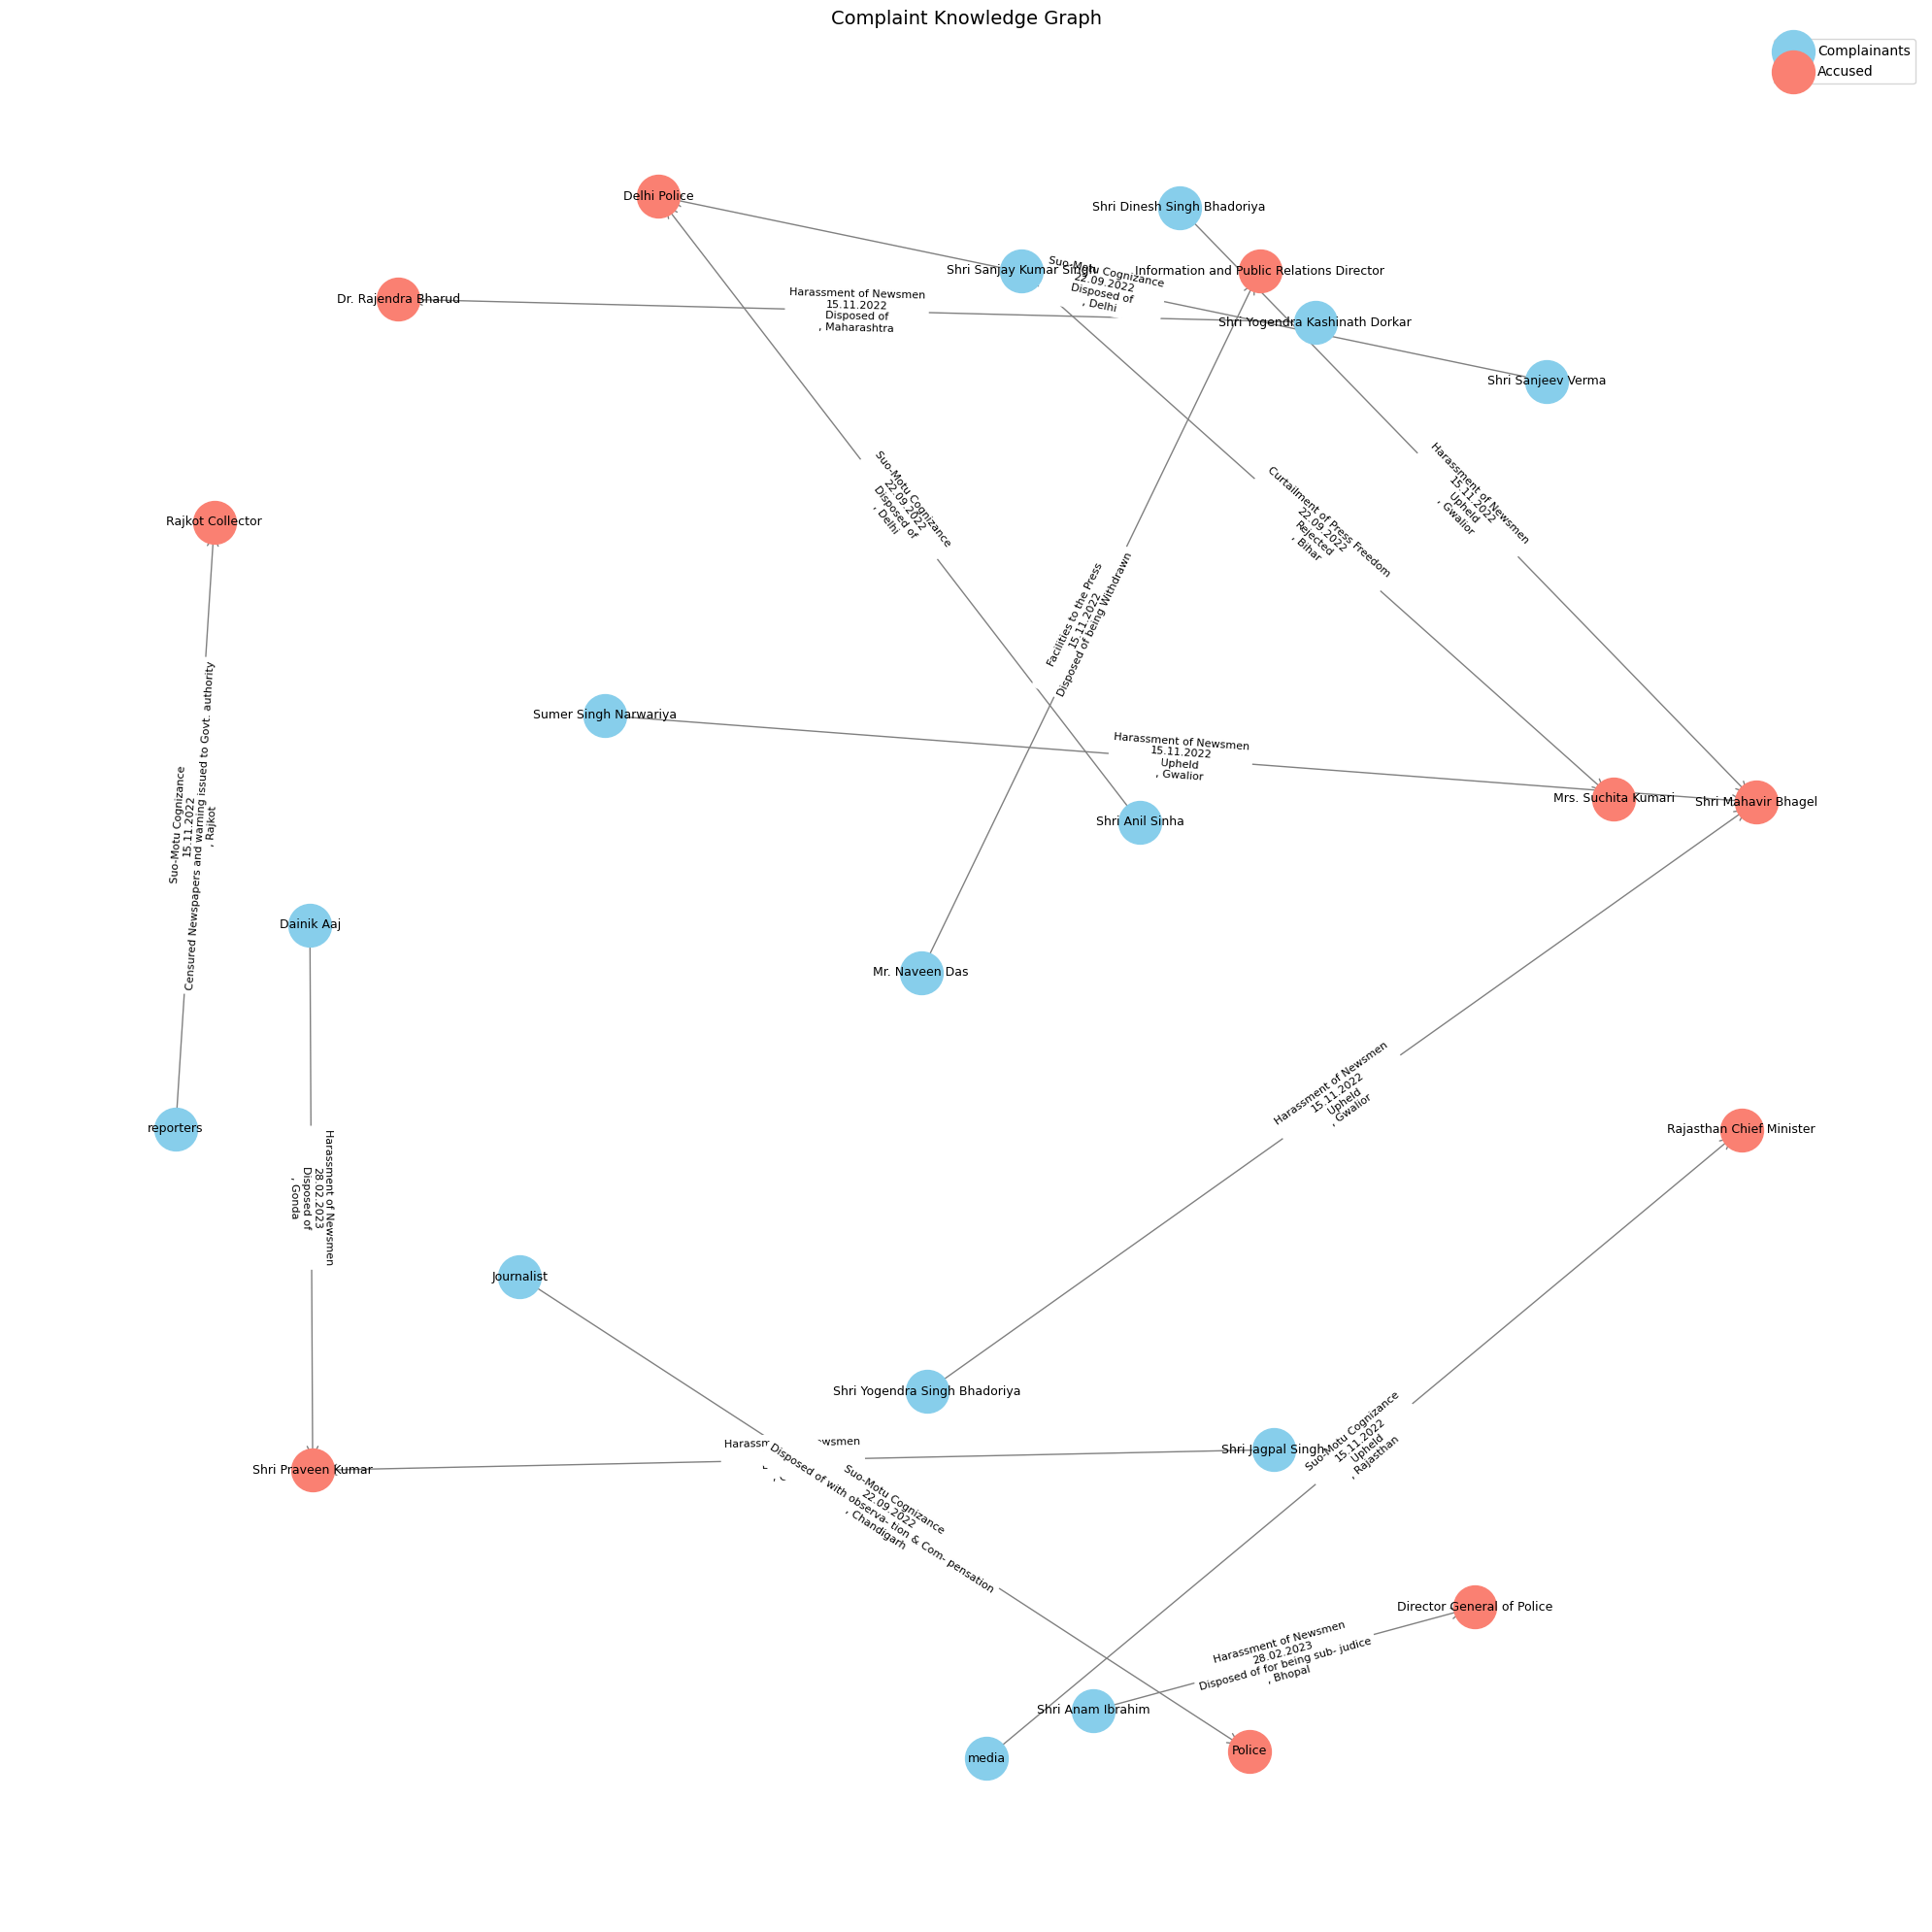

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import re
complaints = arr

# Step 1: Create a directed graph
G = nx.DiGraph()

for complainant, accused, date, status, case_no, category ,place in complaints:
    p=''
    for i in place:
      p+=", "+i
    regex_outside_parentheses = r"\(.*?\)"
    t=text_without_parentheses = re.sub(regex_outside_parentheses, "",status ).strip()
    # t=" ".join(t.split()[:3])

    G.add_node(complainant, type='complainant')
    G.add_node(accused, type='accused')
    label = f"{category}\n{date}\n{t}\n{p}"
    G.add_edge(complainant, accused, label=label)

# Step 3: Draw graph
pos = nx.spring_layout(G, k=1.2, seed=42)
plt.figure(figsize=(20, 20))

# Node types
complainants = [n for n, d in G.nodes(data=True) if d['type'] == 'complainant']
accused = [n for n, d in G.nodes(data=True) if d['type'] == 'accused']

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=complainants, node_color='skyblue', label='Complainants', node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=accused, node_color='salmon', label='Accused', node_size=1000)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=9)

# Draw edges and edge labels
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Final plot
plt.title("Complaint Knowledge Graph", fontsize=14)
plt.axis('off')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
from pyvis.network import Network
from IPython.display import IFrame
import os

# Create network
G = Network(height='600px', width='100%', notebook=True, directed=True,)

for complainant, accused, date, status, case_no, category ,place in complaints:
    p=''
    for i in place:
      p+=", "+i
    regex_outside_parentheses = r"\(.*?\)"
    t=text_without_parentheses = re.sub(regex_outside_parentheses, "",status ).strip()
    # t=" ".join(t.split()[:3])

    G.add_node(complainant, type='complainant')
    G.add_node(accused, type='accused')
    label = f"{category}\n{date}\n{t}\n{p}"
    G.add_edge(complainant, accused, label=label)



# Save and display in Colab
output_path = "complaints_graph_1.html"
G.save_graph(output_path)

# Show in IFrame
IFrame(src=output_path, width='100%', height='600px')


In [22]:
# Install Graphviz and required packages
!apt-get install -y graphviz graphviz-dev
!pip install pygraphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 35 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

AttributeError: 'Network' object has no attribute 'is_directed'

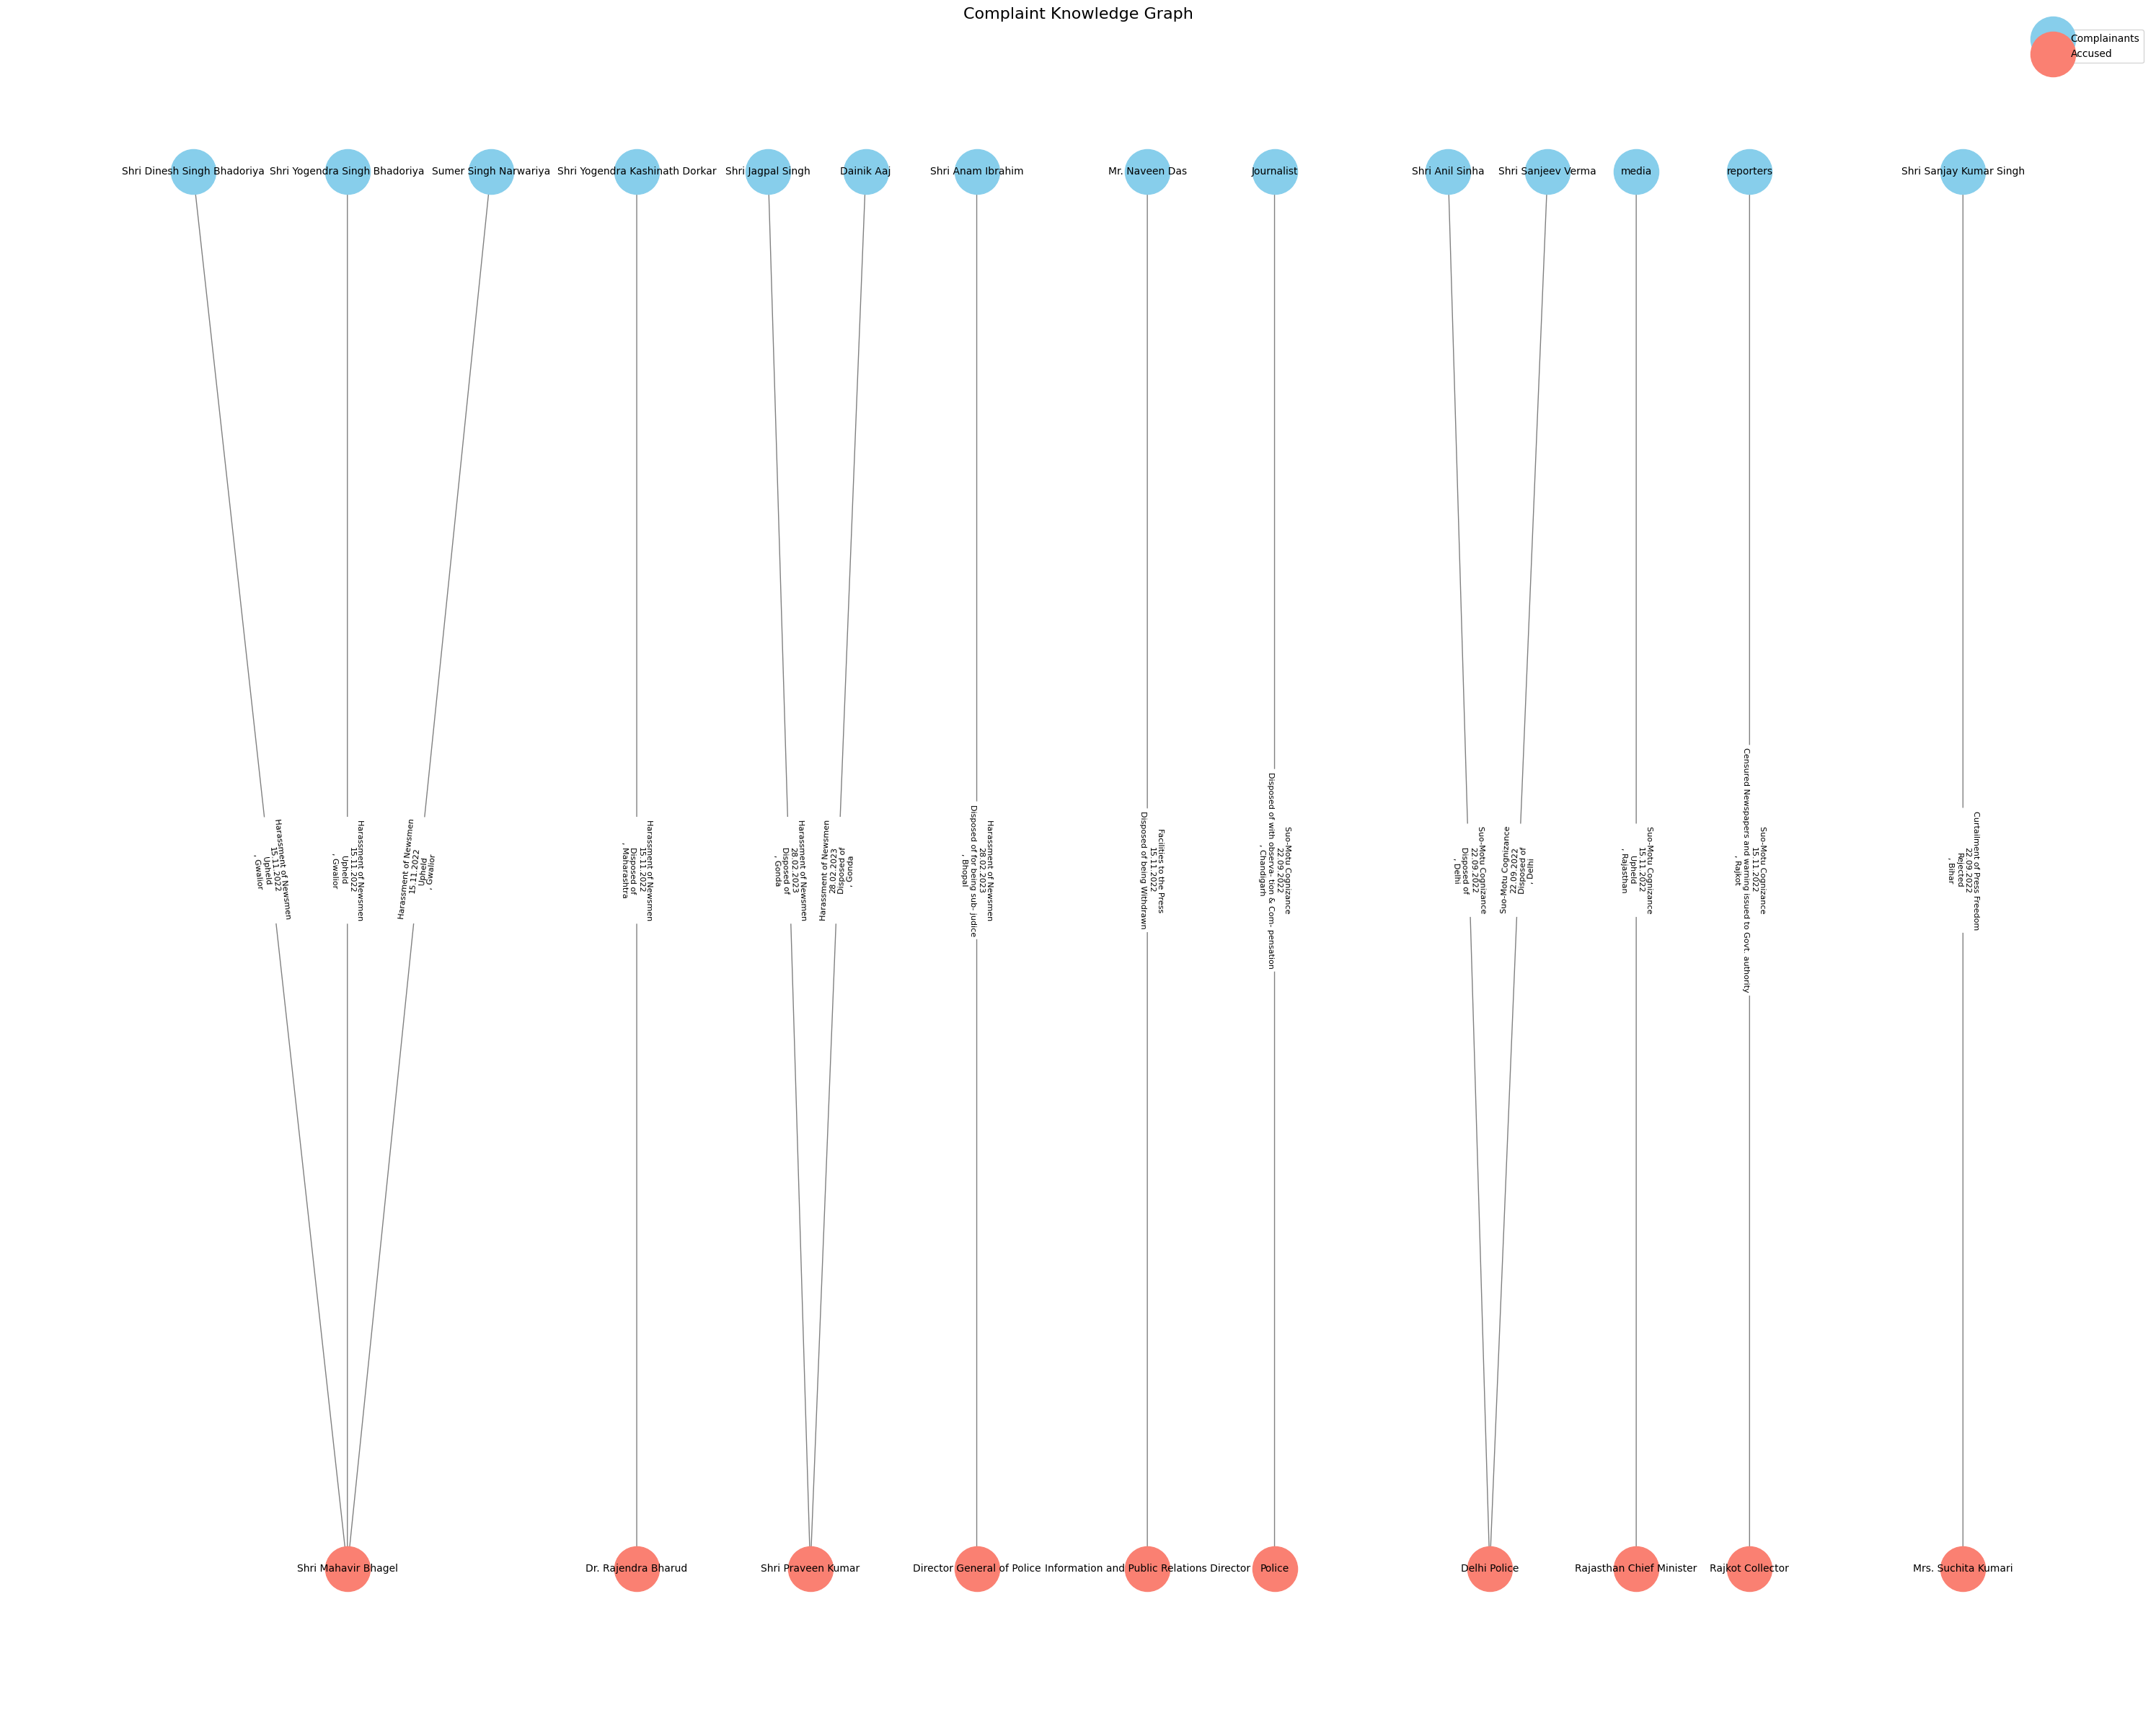

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

try:
    pos = nx.nx_agraph.graphviz_layout
    has_graphviz = True
except:
    has_graphviz = False

complaints = arr

G = nx.DiGraph()

for complainant, accused, date, status, case_no, category ,place in complaints:
    p=''
    for i in place:
      p+=", "+i
    regex_outside_parentheses = r"\(.*?\)"
    t=text_without_parentheses = re.sub(regex_outside_parentheses, "",status ).strip()
    # t=" ".join(t.split()[:3])

    G.add_node(complainant, type='complainant')
    G.add_node(accused, type='accused')
    label = f"{category}\n{date}\n{t}\n{p}"
    G.add_edge(complainant, accused, label=label)

#  Chooseing better layout
if has_graphviz:
    pos = nx.nx_agraph.graphviz_layout(G, prog='dot')  # vertical tree layout
else:
    pos = nx.spring_layout(G, k=2.5, seed=42)

plt.figure(figsize=(30, 24))

complainants = [n for n, d in G.nodes(data=True) if d['type'] == 'complainant']
accused = [n for n, d in G.nodes(data=True) if d['type'] == 'accused']

nx.draw_networkx_nodes(G, pos, nodelist=complainants, node_color='skyblue', label='Complainants', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=accused, node_color='salmon', label='Accused', node_size=2000)

nx.draw_networkx_labels(G, pos, font_size=10, verticalalignment='center')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'label')
edge_labels = {k: v.replace("\\n", "\n") for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, label_pos=0.5)

plt.title("Complaint Knowledge Graph", fontsize=16)
plt.axis('off')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
